# Week 5, Wed, 4/30


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold

In [19]:
# kf = KFold(n_splits=5, shuffle=False, random_state=1)
kf = KFold(n_splits=5, shuffle=False)

In [20]:
df = pd.DataFrame({'x': np.arange(10), 'y': np.arange(10)*2})

In [21]:
df

x   y
0  0   0
1  1   2
2  2   4
3  3   6
4  4   8
5  5  10
6  6  12
7  7  14
8  8  16
9  9  18

In [25]:
for train_idx, test_idx in kf.split(df):
    train_df = df.iloc[train_idx]
    test_df = df.iloc[test_idx]
    # print(f"train:{train_idx}, test:{test_idx}")
    # print("train df")
    # print(train_df)
    # print("test df")
    # print(test_df)

In [30]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

In [26]:


# Load the Penguins dataset
df = sns.load_dataset('penguins')
# features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm']

features = ['flipper_length_mm']
target = ['body_mass_g']  

# Remove missing values based on the features and target
df.dropna(inplace=True)  # Remove missing values


# Initialize linear regression model
model = LinearRegression()

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize a list to store the R^2 scores for each fold
scores = []

# Manually perform cross-validation
k = 1
for train_index, test_index in kf.split(df):

    # Split the data into training and test sets for this fold
    X_train, X_test = df[features].iloc[train_index], df[features].iloc[test_index]
    y_train, y_test = df[target].iloc[train_index], df[target].iloc[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the R^2 score and append to list
    score = r2_score(y_test, y_pred)
    scores.append(score)

    k += 1

    # Output the scores for each fold and the average score
    print(f"Fold {k-1} R^2 score:", score)

print("Average R^2 score:", np.mean(scores))


Fold 1 R^2 score: 0.725084353204537
Fold 2 R^2 score: 0.6993225273807328
Fold 3 R^2 score: 0.7895360534716702
Fold 4 R^2 score: 0.7782229609972657
Fold 5 R^2 score: 0.7946029716861942
Average R^2 score: 0.75735377334808


In [28]:
from sklearn.model_selection import cross_val_score


# Initialize linear regression model
model = LinearRegression()

# Set up 5-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
    
# Perform cross-validation
scores = cross_val_score(model, df[features], df[target], cv=kf, scoring='r2')

# Output the scores for each fold
print("R^2 scores for each fold:", scores)
print("Average R^2 score:", scores.mean())

R^2 scores for each fold: [0.6867769  0.72404235 0.73577659 0.629162   0.84087895 0.72894592
 0.79311648 0.755201   0.68530681 0.87319761]
Average R^2 score: 0.7452404602770445


# Feature Scaling

## Why do we need to scale the features?

For ordinary least squares (OLS) regression, the scale of the features does not matter. However, for some other machine learning method that we will introduce later in this class, the magnitude of the features can have a significant impact on the model. 

Many machine learning algorithm require some notion of "similarity" or "distance" between data points in high-dimensional space. For example, one simple method for prediction is to find the data points that are "closest" to the new data point, and then use the target value of those data points to predict the target value of the new data point.

If we consider the Euclidean distance between two data points, the distance between two points $x$ and $y$ in $d$-dimensional space is

$$ \sqrt{\sum_{i=1}^d (x_i - y_i)^2} $$

where $x_i$ and $y_i$ are the $i$-th feature/coordinate of the two data points. If the features are on different scales, then the distance will be dominated by the features with the largest scale.


Even for linear regression, scaling might help with the interpretation of the coefficients. After standardization, all features are measured in standard deviations, so each coefficient represents the expected change in the target variable for a one standard deviation increase in the feature. This makes it possible to compare the magnitudes of the coefficients, as they’re all in the same units (standard deviations of the features).

Let $X$ be the feature vector (one column of the design matrix) and $X'$ to be the scaled feature vector.

Here some scaling methods:

- Min-max scaling: scales the data to be in the range [0, 1]

$$ X' = \frac{X - \min(X)}{\max(X) - \min(X)} $$

- Standardization (z-score scaling): scales the data to have mean 0 and standard deviation 1

$$ X' = \frac{X - \bar{X}}{\sigma_X} $$

where $\bar{X}$ is the sample mean of $X$ and $\sigma_X$ is the sample standard deviation of $X$.

These are linear transformations of the data. Sometimes we also want to transform the data non-linearly. For example, we might want to take the logarithm of the data if the data spans several orders of magnitude.

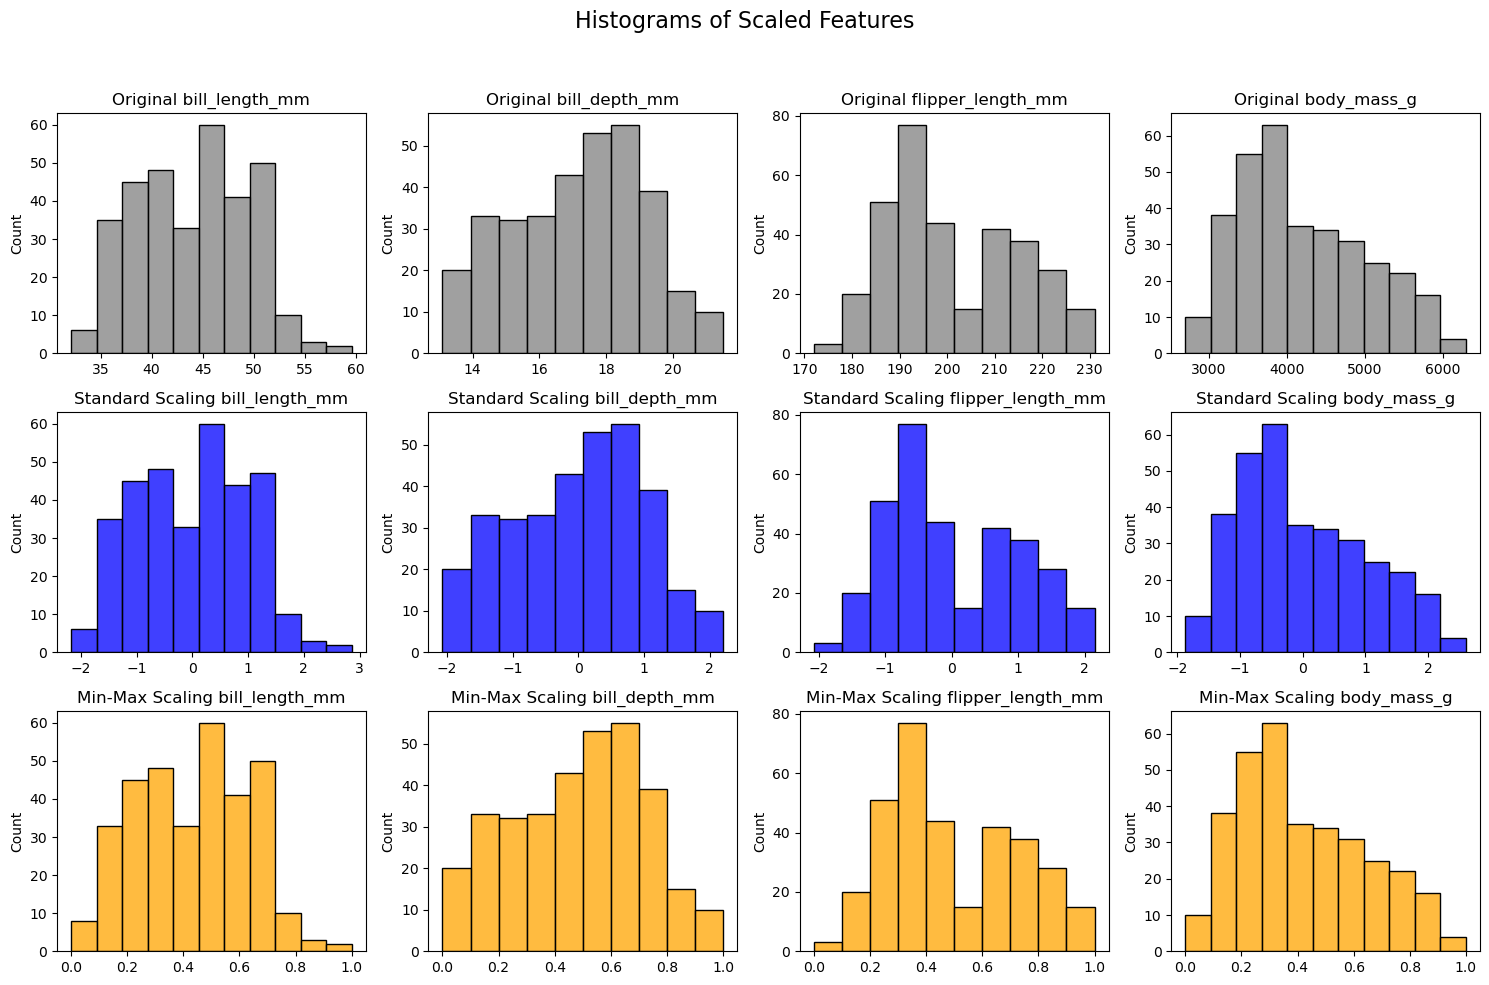

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the Penguins dataset
df = sns.load_dataset('penguins')
df.dropna(inplace=True)  # Remove missing values


# Selecting numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Creating scalers
scalers = {
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler()
}

colors = ['gray', 'blue', 'orange']

# Plotting the histograms
fig, axes = plt.subplots(len(scalers) + 1, len(numerical_features), figsize=(15, 10))
fig.suptitle('Histograms of Scaled Features', fontsize=16)

# Original data histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(df[numerical_features[i]], ax=axes[0, i], color=colors[0])
    axes[0, i].set_title(f'Original {feature}')
    axes[0, i].set_xlabel('')

# Scaled data histograms
for row, (name, scaler) in enumerate(scalers.items(), start=1):
    # Fit and transform the data
    scaled_data = scaler.fit_transform(df[numerical_features])
    scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)
    
    for i, feature in enumerate(scaled_df.columns):
        sns.histplot(scaled_df[feature], ax=axes[row, i], color=colors[row])
        axes[row, i].set_title(f'{name} {feature}')
        axes[row, i].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplots to fit the title
plt.show()